In [1]:
from fastai.text.all import *
import torch
import pickle

ModuleNotFoundError: No module named 'fastai'

In [2]:
pip install fastai

  Attempting uninstall: torch
    Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
from fastai.text.all import *
import torch
import pickle

### Get pretrained AWD-LSTM protrained model (on wikitext103) from Fast.ai

In [4]:
URLs.WT103_FWD

'https://s3.amazonaws.com/fast-ai-modelzoo/wt103-fwd.tgz'

In [5]:
AWDLSTM_PATH = untar_data(URLs.WT103_FWD)
AWDLSTM_PATH

Path('C:/Users/oolus/.fastai/data/wt103-fwd')

### Load the vocab (list of string tokens)

In [6]:
vocab_path = AWDLSTM_PATH.ls()[0]
print(vocab_path)

C:\Users\oolus\.fastai\data\wt103-fwd\itos_wt103.pkl


In [7]:
with open(vocab_path, "rb") as f:
     vocab = pickle.load(f)
        
print(len(vocab))
print(vocab[:100])

60000
['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', 'the', ',', '.', 'of', 'and', 'in', 'to', 'a', '=', '"', 'was', 'on', '-', "'s", 'as', 'for', 'that', 'with', 'by', '\n ', ')', '(', '\n \n ', 'is', 'his', 'at', 'he', 'it', 'from', 'were', 'an', 'had', 'which', 'be', 'this', 'but', "'", 'are', 'not', 'first', 'their', 'after', ';', 'one', 'her', '–', 'also', 'its', ':', 'they', 'two', 'or', 'have', 'who', 'new', 'been', 'has', 'she', 'when', 'time', 'during', 'other', 'would', 'into', 'all', 'more', 'while', 'over', 'i', 'him', 'game', 'only', 'later', 'up', 'most', 'three', 'about', 'out', 'between', 'there', 'than', 'some', 'film', 'may', 'no', 'before', 'made', 'such', 'season', 'second', 'where']


### Load the weights

In [8]:
weights_path = AWDLSTM_PATH.ls()[1]
print(weights_path)

C:\Users\oolus\.fastai\data\wt103-fwd\lstm_fwd.pth


In [10]:
#model_weights = torch.load(weights_path)
model_weights = torch.load(weights_path,map_location=torch.device('cpu'))
print(model_weights.keys())

odict_keys(['0.encoder.weight', '0.encoder_dp.emb.weight', '0.rnns.0.weight_hh_l0_raw', '0.rnns.0.module.weight_ih_l0', '0.rnns.0.module.weight_hh_l0', '0.rnns.0.module.bias_ih_l0', '0.rnns.0.module.bias_hh_l0', '0.rnns.1.weight_hh_l0_raw', '0.rnns.1.module.weight_ih_l0', '0.rnns.1.module.weight_hh_l0', '0.rnns.1.module.bias_ih_l0', '0.rnns.1.module.bias_hh_l0', '0.rnns.2.weight_hh_l0_raw', '0.rnns.2.module.weight_ih_l0', '0.rnns.2.module.weight_hh_l0', '0.rnns.2.module.bias_ih_l0', '0.rnns.2.module.bias_hh_l0', '1.decoder.weight', '1.decoder.bias'])


In [11]:
embedding = model_weights["0.encoder.weight"]
print(embedding.shape)
print(embedding)

torch.Size([60000, 400])
tensor([[-0.1276,  0.0161,  0.1617,  ..., -0.1396,  0.6899, -0.0399],
        [ 0.0272,  0.0011,  0.0401,  ...,  0.0161,  0.0666, -0.0014],
        [ 0.6069, -0.5239,  0.1544,  ..., -0.2551, -0.3308, -0.0702],
        ...,
        [ 0.0096,  0.0814,  0.0213,  ...,  0.0712,  0.0810, -0.0045],
        [ 0.0283, -0.0176,  0.0361,  ...,  0.0756,  0.1470, -0.0139],
        [ 0.1267, -0.0656,  0.0362,  ..., -0.0191,  0.0673,  0.0154]])


# Exercise: Visualize embeddings in 2 dimensions
We need to apply a dimensionality reduction method to convert the 400 dimensions of the embedding to 2 dimensions. We can use:
- TSNE (in [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html))
- UMAP (in [umap-learn](https://umap-learn.readthedocs.io/))

> ### Tip 1
This methods takes time, if we want to get faster results we can get the first 1000 embedding (or other number) for applying the TSNE or UMAP method.

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [16]:
N_EMBEDDINGS = 1000
embedding_subset = embedding[:N_EMBEDDINGS]
vocab_subset     = vocab[:N_EMBEDDINGS]

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(embedding_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.083s...
[t-SNE] Computed neighbors for 1000 samples in 0.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.815740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.585846
[t-SNE] KL divergence after 1000 iterations: 1.422924
t-SNE done! Time elapsed: 5.595213174819946 seconds


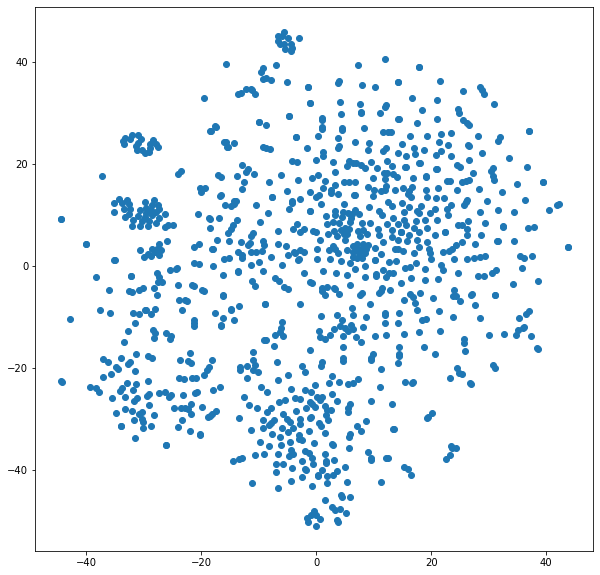

In [29]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1]);

> ### Tip 2
> You can use plotly for plotting the 2d scatter of the embeding cloud. See https://plotly.com/python/text-and-annotations/

In [31]:
import plotly.express as px
px.scatter(tsne_results[:,0],tsne_results[:,1]);

In [33]:
plt.figure(figsize = (10,10))
px.scatter(tsne_results[:,0],tsne_results[:,1],text = vocab_subset,width= 1500, height = 1000)

<Figure size 720x720 with 0 Axes>